In [22]:
import numpy as np
from functions.N_fctn_load_excel import load_excel_to_dataframe
from functions.N_fctn_subset_non_none import subset_non_none_values
from functions.P_fctn_fill_missing_values import fill_missing_values
from functions.B_fctn_drop_columns import drop_columns
import warnings
# Suppress the warning
warnings.filterwarnings("ignore", category=Warning)


In [23]:

daf = load_excel_to_dataframe('MAIN_DATA.xlsx')
daf_reduced = subset_non_none_values(daf, 'real_net_monetary_index')


daf_reduced_copy = daf_reduced.copy()

#nans in coins and artifs filled:
daf_reduced_with_none_being_zero = fill_missing_values(daf_reduced_copy, {'artifs_rate':0, 'coins_rate':0, 'rate_artifs_dummy':0, 'rate_coins_dummy':0}) 

daf_reduced_with_none_being_zero = drop_columns(daf_reduced_with_none_being_zero, ['number_artifs','submitted_number_artifs', 'number_coins', 'submitted_number_coins'],)


daf_reduced_with_none_being_zero = daf_reduced_with_none_being_zero[daf_reduced_with_none_being_zero['coins'] != 0]
#print(daf_reduced_with_none_being_zero)



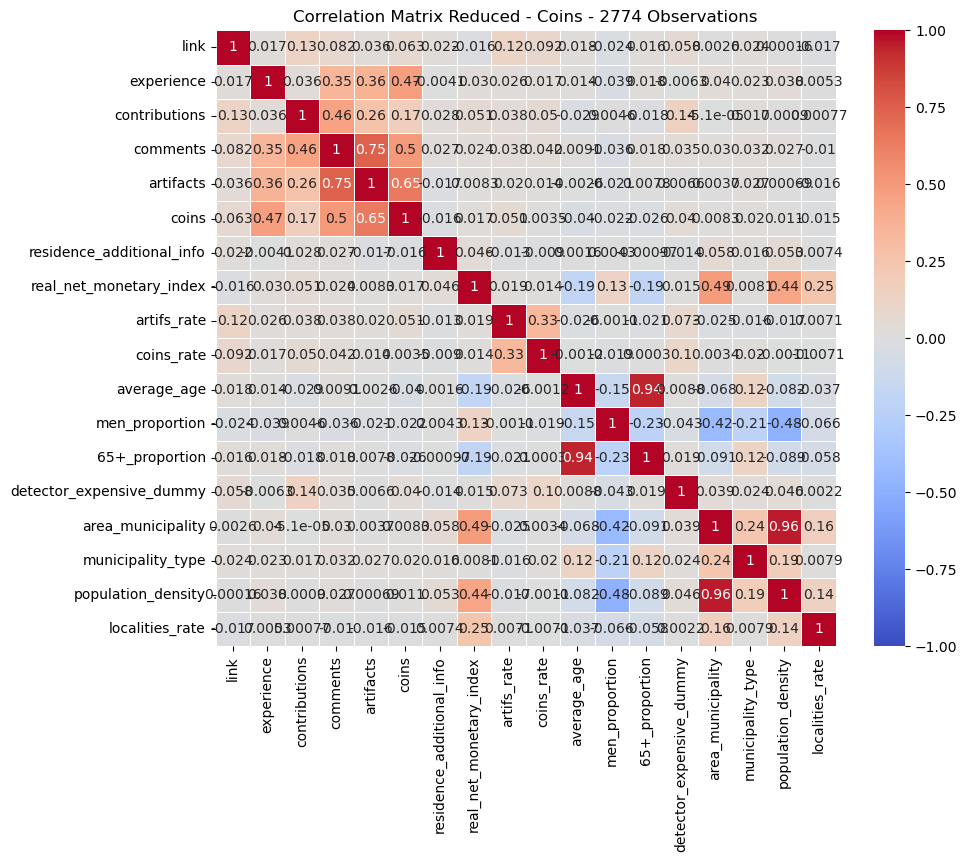

In [24]:

#now correlation matrix:
from functions.Q_fctn_create_correlation_matrix import create_correlation_matrix


create_correlation_matrix(daf_reduced_with_none_being_zero,['link',                                        
'experience',                                  
'contributions',                               
'comments',                                    
'artifacts',                                   
'coins',                                       
'residence_additional_info','real_net_monetary_index',                     
'artifs_rate',                                 
'coins_rate',                                  
'average_age',   
'men_proportion',                              
'65+_proportion',                              
'detector_expensive_dummy',                    
'area_municipality',                           
'municipality_type',                           
'population_density',                         
'localities_rate'],'Correlation Matrix Reduced - Coins - 2774 Observations')



In [25]:

daf_reduced_with_none_being_zero = drop_columns(daf_reduced_with_none_being_zero, ['area_municipality',                           
'municipality_type',                           
'population_density',
'average_age',                                                             
'uploaded_at_least_one_artif_or_coin_dummy',   
'men_proportion',                              
'65+_proportion'])

In [26]:

#############2. summary statistics:
from functions.Q_fction_get_summary_statistics import get_summary_statistics
summary_reduced_1 = get_summary_statistics(daf_reduced_with_none_being_zero)
print(summary_reduced_1 )


                           count  unique                mode  frequency
profile                     2774    2774               Detek          1
link                        2774       2                 0.0       2680
experience                  2774     580                 0.0        970
contributions               2774      67                 0.0       2237
comments                    2774     368                 0.0        218
artifacts                   2774     181                 0.0        505
coins                       2774     122                 1.0        778
residence_additional_info   2774       2                 0.0       2747
municipality                2774     692               Praha        244
municipal_office            2774     328  Hlavní město Praha        270
real_net_monetary_index     2774     328            1.131666        270
artifs_rate                 2774     143                 0.0       2551
coins_rate                  2774      39                 0.0    

In [27]:
from functions.Q_fction_get_summary_statistics import get_extended_summary_statistics
summary_reduced_1_ext = get_extended_summary_statistics(daf_reduced_with_none_being_zero)
print(summary_reduced_1_ext)


                            count    mean      std   min   25%    50%    75%  \
link                       2774.0    0.03     0.18  0.00  0.00   0.00   0.00   
experience                 2774.0  687.26  6616.97  0.00  0.00  13.00  98.00   
contributions              2774.0    2.57    30.98  0.00  0.00   0.00   0.00   
comments                   2774.0  122.07   723.19  0.00  3.00  12.00  42.00   
artifacts                  2774.0   21.86    83.07  0.00  1.00   5.00  18.00   
coins                      2774.0   10.77    24.99  1.00  1.00   3.00  10.00   
residence_additional_info  2774.0    0.01     0.10  0.00  0.00   0.00   0.00   
real_net_monetary_index    2774.0    1.00     0.07  0.77  0.95   0.98   1.05   
artifs_rate                2774.0    0.01     0.07  0.00  0.00   0.00   0.00   
coins_rate                 2774.0    0.00     0.05  0.00  0.00   0.00   0.00   
rate_artifs_dummy          2774.0    0.08     0.27  0.00  0.00   0.00   0.00   
rate_coins_dummy           2774.0    0.0

In [28]:

df_log_coins = daf_reduced_with_none_being_zero[['artifs_rate', 'experience','contributions',               
'comments',                    
'artifacts',                   
'coins',                                      
'real_net_monetary_index',                 
'coins_rate',                    
'localities_rate','rate_artifs_dummy',                           
'rate_coins_dummy', 'link', 'residence_additional_info', 'detector_expensive_dummy']]


df_log_coins['log_experience'] = np.log(df_log_coins['experience'].values + 1)
df_log_coins['log_contributions'] = np.log(df_log_coins['contributions'].values + 1)
df_log_coins['log_comments'] = np.log(df_log_coins['comments'].values + 1)
df_log_coins['log_artifacts'] = np.log(df_log_coins['artifacts'].values + 1)
df_log_coins['log_coins'] = np.log(df_log_coins['coins'].values + 1)
df_log_coins['log_coins_rate'] = np.log(df_log_coins['coins_rate'].values + 1)
df_log_coins['log_artifs_rate'] = np.log(df_log_coins['artifs_rate'].values + 1)
df_log_coins['reverse_coins_rate'] = (1 - df_log_coins['coins_rate'].values) 




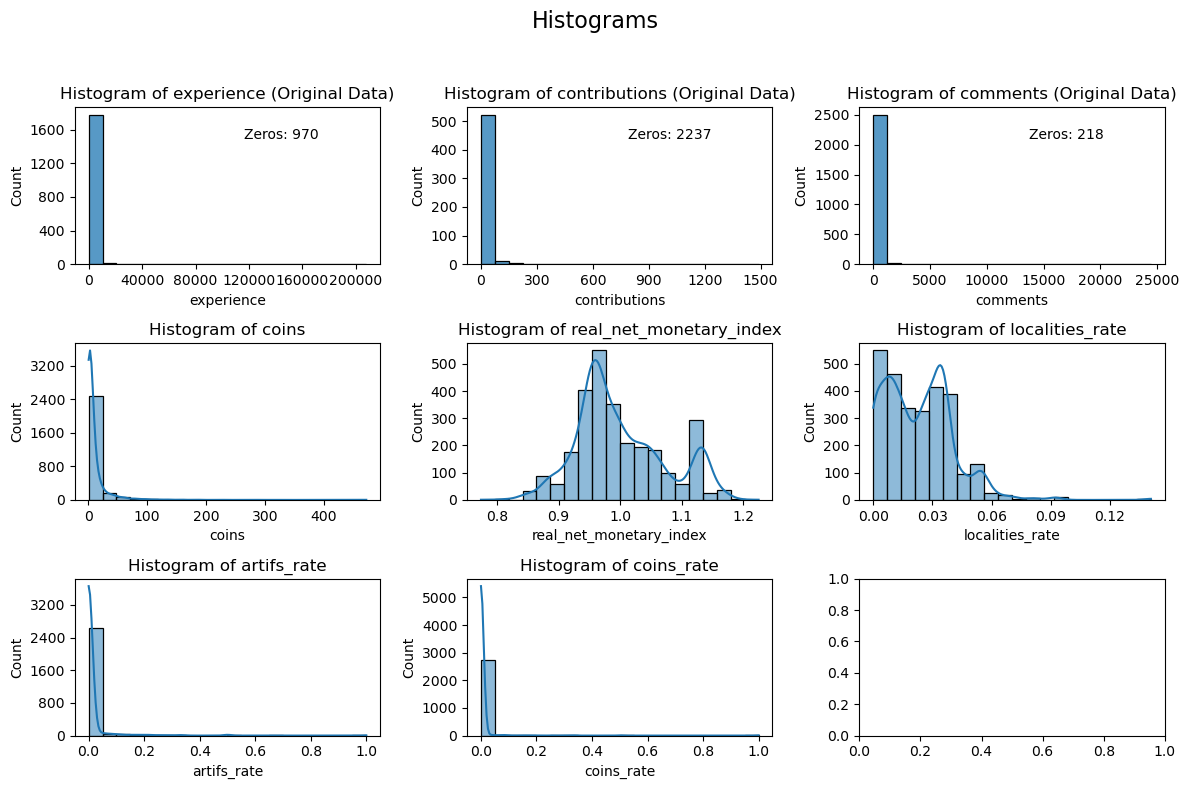

In [29]:
from functions.S_fctn_create_combined_hist import create_histograms_all

create_histograms_all(df_log_coins, [                        
'experience',                  
'contributions',               
'comments',                                       
'coins',                                      
'real_net_monetary_index',                    
'localities_rate', 'artifs_rate', 'coins_rate'])

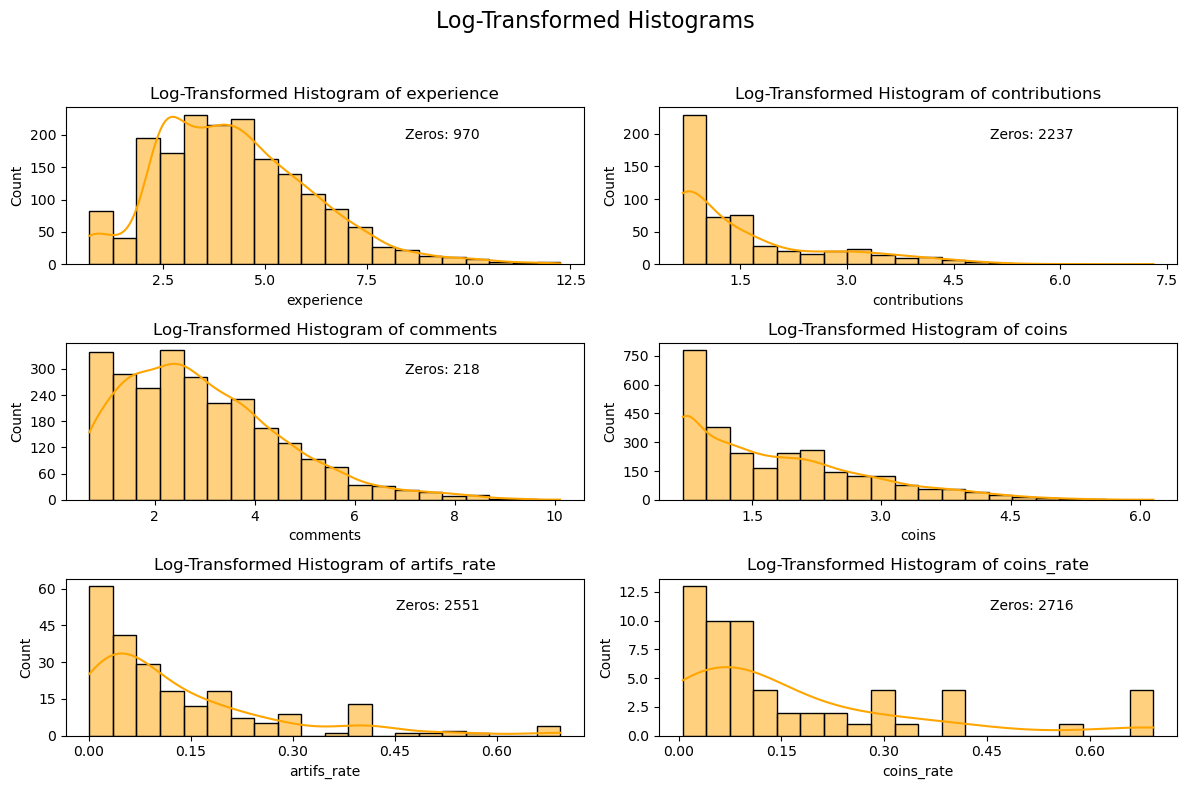

In [30]:
from functions.S_fctn_create_combined_hist import create_log_transformed_histograms
create_log_transformed_histograms(df_log_coins, [                        
'experience',                  
'contributions',               
'comments',                                    
'coins',                                                          
'artifs_rate', 'coins_rate'])


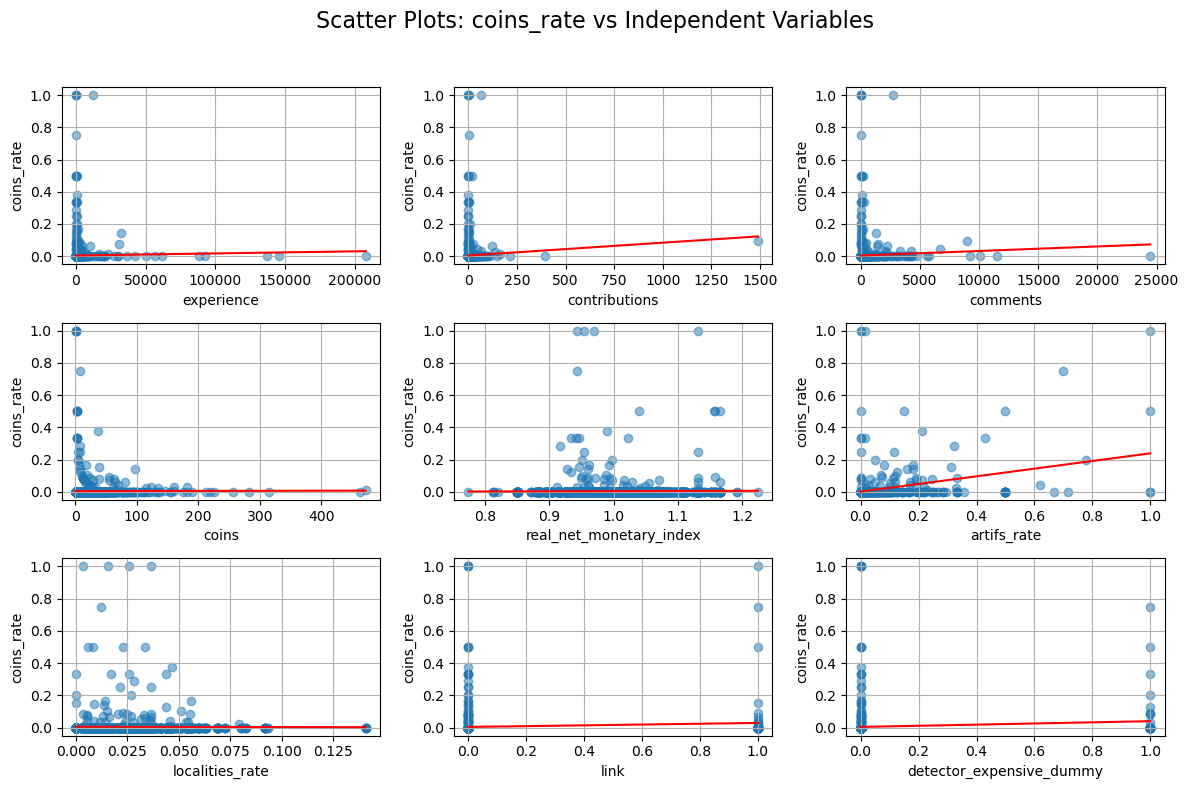

In [31]:
#'PLOT INITIAL SCATTER PLOTS
from functions.Q_fctn_plot_scatter import plot_scatter_all
plot_scatter_all(df_log_coins, 'coins_rate', ['experience', 'contributions',
                                     'comments', 'coins',
                                     'real_net_monetary_index', 'artifs_rate', 'localities_rate','link','detector_expensive_dummy'])


In [32]:
from functions.W_fctn_print_top import print_top_observations

print_top_observations(df_log_coins, columns=[ 'experience','contributions',               
'comments',                    
'coins'])

Top 5 observations for column 'experience':
      experience  contributions  comments  coins
119       207830             25      3085    282
1262      145348              2     11539    463
2615      137050              3      3371    154
1664       92662             56      3044    138
120        88322              3      1432      8

Top 5 observations for column 'contributions':
      experience  contributions  comments  coins
61           604           1489      8964     54
1580          74            395     24463    257
851           80            215      2005     12
756        16429            164      1175    472
2252          30            149      2023      3

Top 5 observations for column 'comments':
      experience  contributions  comments  coins
1580          74            395     24463    257
1262      145348              2     11539    463
4030        7914             20     10105      8
128         2795              6      9250    175
61           604           1489 

In [33]:

df_log_2 = df_log_coins.copy()




df_log_2 = df_log_2[df_log_2['experience'] != 207830]
df_log_2 = df_log_2[df_log_2['contributions'] != 1489]
df_log_2 = df_log_2[df_log_2['comments'] != 24463]
                                                    #DELETE THE MOST SIGNIFICANT OUTLIERS
df_log_3 = df_log_2.copy()

df_log_2 = df_log_2[df_log_2['coins_rate'] != 1]  #DELETE THE ONES

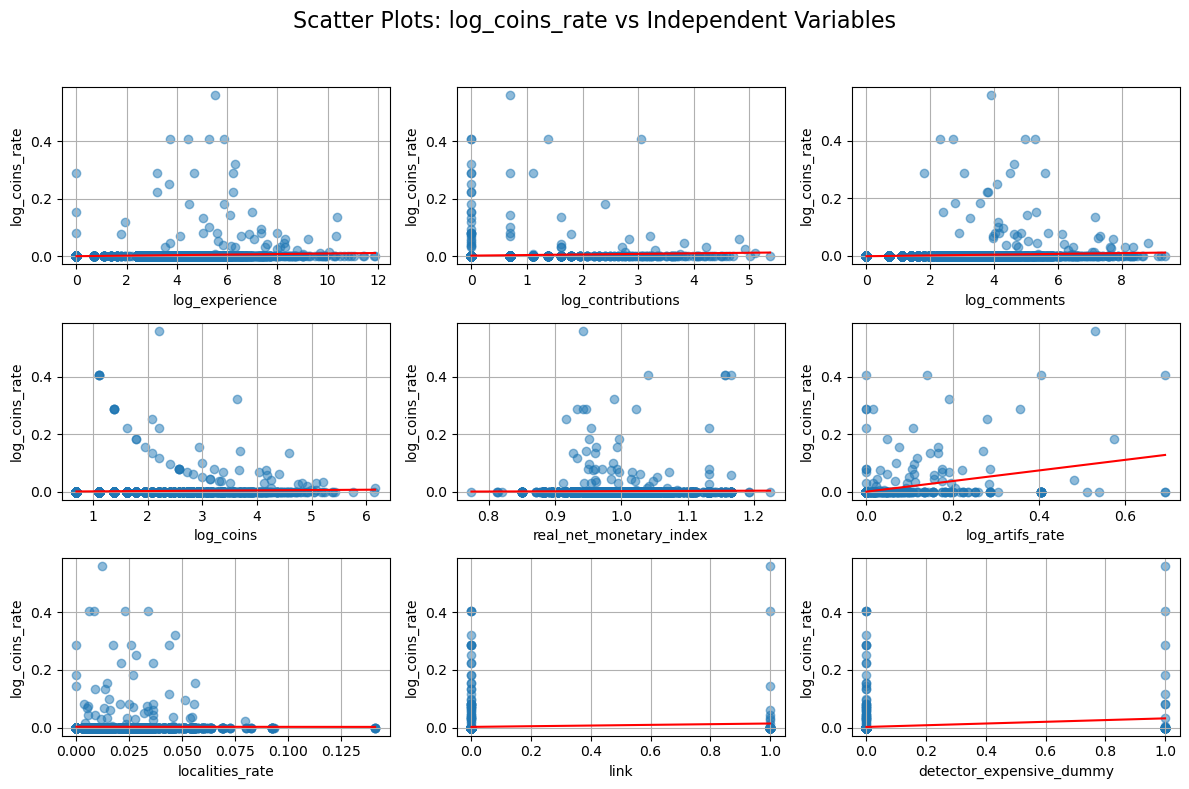

In [34]:
#plot scatter plots after log transform and without outliers:
from functions.Q_fctn_plot_scatter import plot_scatter_all
plot_scatter_all(df_log_2, 'log_coins_rate', ['log_experience', 'log_contributions', 
                                      'log_comments', 'log_coins', 
                                     'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link','detector_expensive_dummy'])

In [35]:
from functions.V_fct_OLS_REGRESSION import ols_regression

#first model, without log transform:
model1 = ols_regression(df_log_2, 'coins_rate', [ 'experience', 'contributions', 'comments', 'coins',
                                      'real_net_monetary_index', 'log_artifs_rate', 'localities_rate', 'link', 'detector_expensive_dummy'])

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:             coins_rate   R-squared:                       0.161
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     58.85
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           9.04e-99
Time:                        21:24:40   Log-Likelihood:                 5927.3
No. Observations:                2767   AIC:                        -1.183e+04
Df Residuals:                    2757   BIC:                        -1.178e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

In [36]:

model2 = ols_regression(df_log_2, 'log_coins_rate', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_coins',
                                     'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link', 'detector_expensive_dummy'])



Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         log_coins_rate   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     60.22
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          5.49e-101
Time:                        21:24:40   Log-Likelihood:                 6444.2
No. Observations:                2767   AIC:                        -1.287e+04
Df Residuals:                    2757   BIC:                        -1.281e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

In [37]:
from functions.V_fctn_OLS_ROBUST import ols_regression_robust


model2_ROBUST = ols_regression_robust(df_log_2, 'log_coins_rate', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_coins',
                                     'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link', 'detector_expensive_dummy'])

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:         log_coins_rate   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     4.867
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.73e-06
Time:                        21:24:40   Log-Likelihood:                 6444.2
No. Observations:                2767   AIC:                        -1.287e+04
Df Residuals:                    2757   BIC:                        -1.281e+04
Df Model:                           9                                         
Covariance Type:                  HC1                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

In [38]:
from functions.V_fctn_OLS_WLS import ols_regression_wls
model2_WLS = ols_regression_wls(df_log_2, 'log_coins_rate', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_coins',
                                     'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link', 'detector_expensive_dummy'])


Regression Summary:
                            WLS Regression Results                            
Dep. Variable:         log_coins_rate   R-squared:                       0.381
Model:                            WLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     188.2
Date:                Thu, 10 Aug 2023   Prob (F-statistic):          5.00e-279
Time:                        21:24:40   Log-Likelihood:                 19426.
No. Observations:                2767   AIC:                        -3.883e+04
Df Residuals:                    2757   BIC:                        -3.877e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

In [39]:
model2_LPM = ols_regression_robust(df_log_3, 'rate_coins_dummy', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_coins',
                                     'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link', 'detector_expensive_dummy'])


Regression Summary:
                            OLS Regression Results                            
Dep. Variable:       rate_coins_dummy   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     8.435
Date:                Thu, 10 Aug 2023   Prob (F-statistic):           1.59e-12
Time:                        21:24:40   Log-Likelihood:                 1769.3
No. Observations:                2771   AIC:                            -3519.
Df Residuals:                    2761   BIC:                            -3459.
Df Model:                           9                                         
Covariance Type:                  HC1                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
cons

Optimization terminated successfully.
         Current function value: 0.062739
         Iterations 9


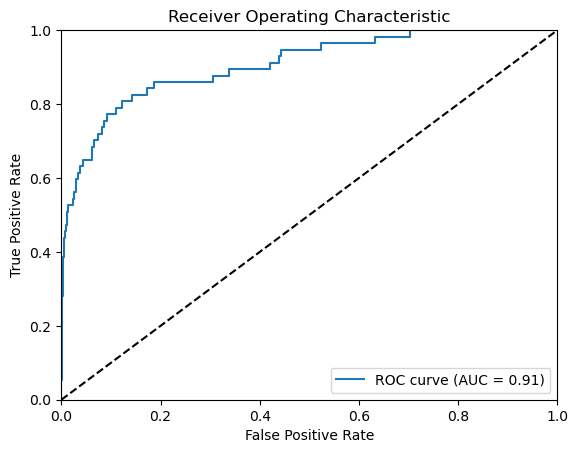

Confusion Matrix:
Predicted     0   1
Actual             
0.0        2709   5
1.0          45  12

Partial Effect At the Average (PEA):
        Logit Marginal Effects       
Dep. Variable:       rate_coins_dummy
Method:                          dydx
At:                           overall
                              dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
log_experience               0.0009      0.001      0.719      0.472      -0.002       0.003
log_contributions           -0.0004      0.002     -0.168      0.867      -0.005       0.004
log_comments                 0.0065      0.002      3.016      0.003       0.002       0.011
log_coins                    0.0059      0.003      2.237      0.025       0.001       0.011
real_net_monetary_index     -0.0003      0.032     -0.010      0.992      -0.063       0.063
log_artifs_rate              0.1642      0.022      7.325    

In [40]:
from functions.V_fctn_LOGIT import logit_regression_roc_wald
model2_LOGIT = logit_regression_roc_wald(df_log_3, dependent_var='rate_coins_dummy', independent_vars=['log_experience', 'log_contributions', 
                                     'log_comments', 'log_coins',
                                     'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link', 'detector_expensive_dummy'],
                                     pev_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'], 
                                     ape_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'],
                                     hypotheses_variables=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'])


Optimization terminated successfully.
         Current function value: 0.062980
         Iterations 9


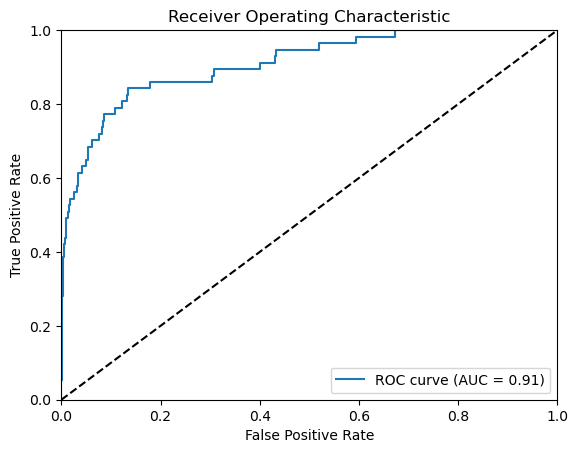

Confusion Matrix:
Predicted     0  1
Actual            
0.0        2711  3
1.0          48  9

Partial Effect At the Average (PEA):
       Probit Marginal Effects       
Dep. Variable:       rate_coins_dummy
Method:                          dydx
At:                           overall
                              dy/dx    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
log_experience               0.0009      0.001      0.718      0.473      -0.002       0.003
log_contributions        -5.411e-05      0.002     -0.023      0.982      -0.005       0.005
log_comments                 0.0063      0.002      2.882      0.004       0.002       0.011
log_coins                    0.0051      0.003      1.995      0.046    8.98e-05       0.010
real_net_monetary_index      0.0059      0.032      0.181      0.857      -0.058       0.070
log_artifs_rate              0.1771      0.024      7.457      0.

In [41]:
from functions.V_fctn_PROBIT import probit_regression_roc_wald


model2_PROBIT = probit_regression_roc_wald(df_log_3, 'rate_coins_dummy', ['log_experience', 'log_contributions', 
                                     'log_comments', 'log_coins',
                                     'real_net_monetary_index', 'log_artifs_rate', 'localities_rate','link', 'detector_expensive_dummy'],
                                     pev_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'], 
                                     ape_vars=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'],
                                     hypotheses_variables=['real_net_monetary_index', 'detector_expensive_dummy', 'localities_rate'])
